# **Data Wrangling**

Estimated time needed: **30** minutes

In this lab, you will use the skills acquired in the module and address the issues of handling missing data, correct the data type of the dataframe attribute and execute the processes of data standardization and data normalization on specific attributes of the dataset.

# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_I recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Read the laptop price dataset from the classes:
Go to classes > content > Additional Materials > laptop_pricing_dataset.csv


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\Aditya Bhuran\OneDrive - Pace University\Desktop\Python-CS-661\Assignment-7\laptop_pricing_dataset.csv")

print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (238, 13)


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Verify loading by displaying the dataframe summary using `dataframe.info()`


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


View the first 5 values of the updated dataframe using `dataframe.head()`


In [4]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [5]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data.


In [6]:
# Task 1: Find missing data
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

# Percent missing
missing_pct = (missing_counts / len(df)) * 100
print("\nPercent missing per column:\n", missing_pct.round(2))

# Preview rows with missing data
df[df.isna().any(axis=1)].head()



Missing values per column:
 Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

Percent missing per column:
 Unnamed: 0        0.00
Manufacturer      0.00
Category          0.00
Screen            0.00
GPU               0.00
OS                0.00
CPU_core          0.00
Screen_Size_cm    1.68
CPU_frequency     0.00
RAM_GB            0.00
Storage_GB_SSD    0.00
Weight_kg         2.10
Price             0.00
dtype: float64


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
29,29,HP,3,IPS Panel,3,1,5,35.56,2.5,6,256,NaN,837
38,38,HP,3,IPS Panel,2,1,5,33.02,2.5,4,256,NaN,888
49,49,Dell,4,Full HD,2,1,5,33.78,1.6,8,256,NaN,1777
61,61,Dell,3,Full HD,1,2,7,39.62,2.7,16,256,NaN,1142
68,68,Dell,3,Full HD,1,2,7,39.62,1.8,8,256,NaN,934


# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. Note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [7]:
# Replace numeric missing values (example: 'Weight_kg')
if 'Weight_kg' in df.columns:
    mean_weight = df['Weight_kg'].astype(float).mean()
    df['Weight_kg'].fillna(mean_weight, inplace=True)
    print(f"Filled Weight_kg NaN with mean = {mean_weight:.2f}")

# Replace categorical missing values (example: 'Screen')
if 'Screen' in df.columns:
    mode_screen = df['Screen'].mode()[0]
    df['Screen'].fillna(mode_screen, inplace=True)
    print(f"Filled Screen NaN with mode = {mode_screen}")

# Verify
df.isna().sum()



Filled Weight_kg NaN with mean = 1.86
Filled Screen NaN with mode = Full HD


C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_33596\198196071.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(mean_weight, inplace=True)
C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_33596\198196071.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. Note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [8]:
# Replace missing values in 'Screen_Size_cm' with its most frequent (mode) value
if 'Screen_Size_cm' in df.columns:
    mode_value = df['Screen_Size_cm'].mode()[0]
    df['Screen_Size_cm'].fillna(mode_value, inplace=True)
    print(f"Filled missing values in 'Screen_Size_cm' with mode: {mode_value}")
else:
    print("Column 'Screen_Size_cm' not found. Please check the column name using df.columns")


Filled missing values in 'Screen_Size_cm' with mode: 39.62


C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_33596\584011812.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(mode_value, inplace=True)


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [9]:
# Convert weight and screen size to numeric
for col in ['Weight_kg', 'Screen Size']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"{col} fixed: now numeric with mean fill.")



Weight_kg fixed: now numeric with mean fill.


C:\Users\Aditya Bhuran\AppData\Local\Temp\ipykernel_33596\791646113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [10]:
# Detect screen size and weight columns automatically
screen_col = None
weight_col = None

for c in df.columns:
    if 'screen' in c.lower() and 'size' in c.lower():
        screen_col = c
    if 'weight' in c.lower():
        weight_col = c

print(f"Detected screen column: {screen_col}")
print(f"Detected weight column: {weight_col}")

# Convert and create new unit columns
if screen_col:
    df['Screen_cm'] = df[screen_col].astype(float)
else:
    print("No screen size column found.")

if weight_col:
    df['Weight_lbs'] = df[weight_col].astype(float) * 2.205
else:
    print("No weight column found.")

# Display results safely
cols_to_show = [c for c in ['Screen_cm', 'Weight_lbs'] if c in df.columns]
df[cols_to_show].head()


Detected screen column: Screen_Size_cm
Detected weight column: Weight_kg


,Screen_cm,Weight_lbs
0,35.56,3.52800
1,39.62,4.85100
2,39.62,4.85100
3,33.78,2.69010
4,39.62,4.21155


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [11]:
# Normalize CPU_frequency with respect to the maximum value
df['CPU_frequency_normalized'] = df['CPU_frequency'] / df['CPU_frequency'].max()

print(df[['CPU_frequency', 'CPU_frequency_normalized']].head())



   CPU_frequency  CPU_frequency_normalized
0            1.6                  0.551724
1            2.0                  0.689655
2            2.7                  0.931034
3            1.6                  0.551724
4            1.8                  0.620690


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [12]:
# Detect price column
price_col = None
for c in ['Price','price_euros','price','Price_USD']:
    if c in df.columns:
        price_col = c
        break

if price_col:
    df['Price-binned'] = pd.qcut(df[price_col], q=3, labels=['Low','Medium','High'])
    print("Price binned into 3 categories.")
    print(df['Price-binned'].value_counts())
else:
    print("Price column not found — check column names.")



Price binned into 3 categories.
Price-binned
Low       80
High      80
Medium    78
Name: count, dtype: int64


Also, plot the bar graph of these bins.


Price-binned
Low       80
Medium    78
High      80
Name: count, dtype: int64


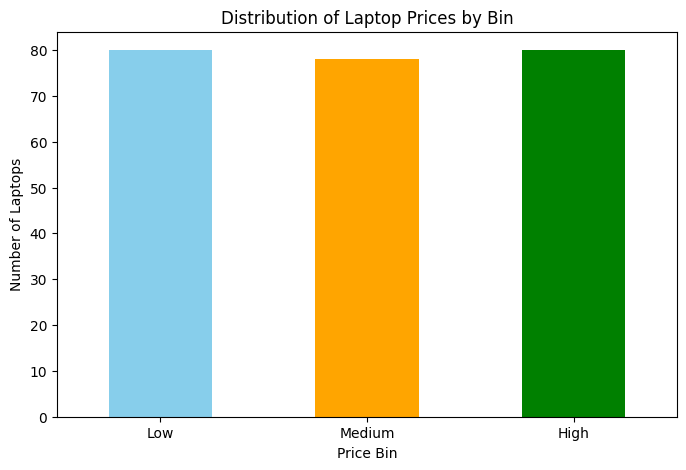

In [13]:
import matplotlib.pyplot as plt

# 1. Count how many items in each bin
counts = df['Price-binned'].value_counts().sort_index()
print(counts)

# 2. Plot a bar graph
plt.figure(figsize=(8,5))
counts.plot(kind='bar', color=['skyblue','orange','green'])
plt.title('Distribution of Laptop Prices by Bin')
plt.xlabel('Price Bin')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=0)
plt.show()



# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [14]:
# Create indicator columns from 'Screen' attribute
if 'Screen' in df.columns:
    df['Touch'] = df['Screen'].astype(str).str.contains('touch', case=False, na=False).astype(int)
    df['Full_HD'] = df['Screen'].astype(str).str.contains('full hd|1920x1080', case=False, na=False).astype(int)
    df.drop(columns=['Screen'], inplace=True)
    print("Added Touch and Full_HD, dropped Screen.")
else:
    print("Screen column not found.")



Added Touch and Full_HD, dropped Screen.


This version of the dataset, now finalized, is the one you'll be using in all subsequent modules.


Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [15]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_cm  \
0           0         Acer         4    2   1         5           35.56   
1           1         Dell         3    1   1         3           39.62   
2           2         Dell         3    1   1         7           39.62   
3           3         Dell         4    2   1         5           33.78   
4           4           HP         4    2   1         7           39.62   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  Screen_cm  \
0            1.6       8             256       1.60    978      35.56   
1            2.0       4             256       2.20    634      39.62   
2            2.7       8             256       2.20    946      39.62   
3            1.6       8             128       1.22   1244      33.78   
4            1.8       8             256       1.91    837      39.62   

   Weight_lbs  CPU_frequency_normalized Price-binned  Touch  Full_HD  
0     3.52800                  0.551724